In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Quiz 1

**Q1:** Age + Years at current employer + Years at current address + Income over the past year - Current credit card debt - Current automobile debt

**Q2:**

In [4]:
train = pd.read_csv('train_final.csv', header=None)

In [6]:
train.columns = ['id', 'age', 'employ', 'address', 'income', 'ccdebt', 'cardebt', 'label']

In [24]:
train['score'] = train['age'] + train['employ'] + train['address'] + train['income'] - train['ccdebt'] - train['cardebt']

In [36]:
pos_count = (train['label'] == 1).sum()
neg_count = (train['label'] == 0).sum()
pos_count, neg_count

(50, 150)

In [30]:
sorted_labels = list(train.sort_values(by='score', ascending=False)['label'])

In [43]:
pos_true = 0
pos_false = 0
tpr = []
fpr = []
for index, label in enumerate(sorted_labels):
    if label == 1:
        pos_true += 1
    else:
        pos_false += 1
    tpr.append(pos_true/pos_count)
    fpr.append(pos_false/neg_count)

(0, 0.05)

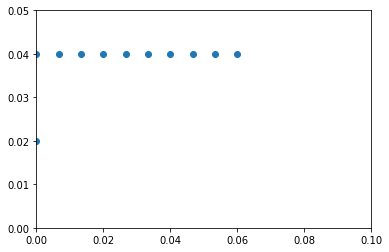

In [52]:
plt.scatter(fpr, tpr)
plt.xlim([0, 0.1])
plt.ylim([0, 0.05])

In [76]:
auc = sum(pd.Series(fpr).diff(1).fillna(0) * pd.Series(tpr))
auc

0.424

In [25]:
roc_auc_score(train['label'], train['score'])

0.424

**Q3:**

In [79]:
def count_pos(sorted_labels):
    pos_true = 0
    pos_false = 0
    pos_true_count = []
    pos_false_count = []
    for index, label in enumerate(sorted_labels):
        if label == 1:
            pos_true += 1
        else:
            pos_false += 1
        pos_true_count.append(pos_true)
        pos_false_count.append(pos_false)
    return pos_true_count, pos_false_count

In [80]:
def calculate_auc(df):
    df['score'] = df['age'] + df['employ'] + df['address'] + df['income'] - df['ccdebt'] - df['cardebt']
    pos_count = (df['label'] == 1).sum()
    neg_count = (df['label'] == 0).sum()
    print(pos_count, neg_count)
    sorted_labels = list(df.sort_values(by='score', ascending=False)['label'])
    tpc, fpc = count_pos(sorted_labels)
    tpr = [count / pos_count for count in tpc]
    fpr = [count / neg_count for count in fpc]
    auc = sum(pd.Series(fpr).diff(1).fillna(0) * pd.Series(tpr))
    return auc

In [81]:
test = pd.read_csv('test_final.csv', header=None)

In [82]:
test.columns = ['id', 'age', 'employ', 'address', 'income', 'ccdebt', 'cardebt', 'label']

In [83]:
calculate_auc(test)

50 150


0.46253333333333346

**Q4:** Find cost minimizing threshold

In [84]:
fn_cost = 5000
fp_cost = 2500